# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df['sales_channel'] = df['sales_channel'].astype('category')
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [10]:
df = pd.get_dummies(df,columns=['sales_channel'], prefix='channel', dtype='int')
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_Internet,channel_Mobile
0,2,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0
1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0
2,2,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0
3,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0
4,2,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0


In [11]:
df['trip_type'] = df['trip_type'].astype('category')
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [12]:
df = pd.get_dummies(df,columns=['trip_type'], prefix='trip_type', dtype='int')
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_Internet,channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1


In [13]:
df['route'] = df['route'].astype('category')
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
BDOWUH       1
CNXXIY       1
MELNRT       1
CNXDEL       1
URTXIY       1
Name: count, Length: 799, dtype: int64

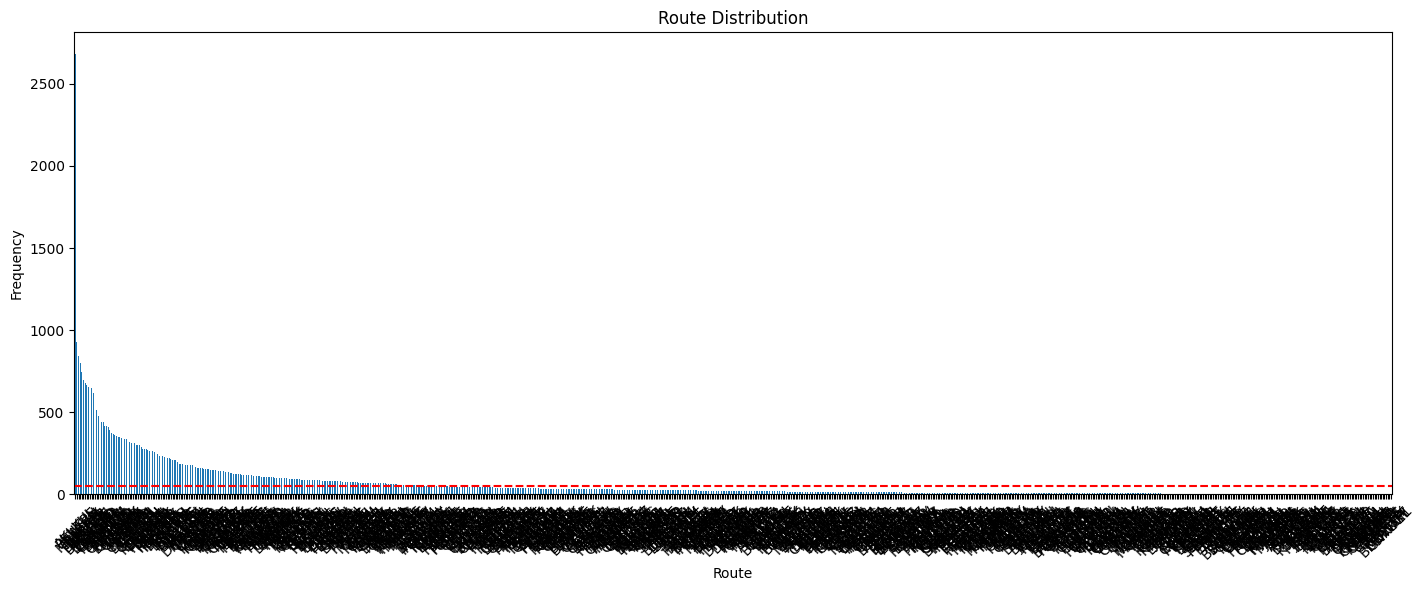

In [14]:
route_counts = df['route'].value_counts()

plt.figure(figsize=(17, 6))
route_counts.plot(kind='bar')
plt.title('Route Distribution')
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.axhline(y=50, color = 'r', linestyle='--')
plt.show()

In [15]:
df['start'] = df['route'].apply(lambda x: x[:3])
df['destinatio'] = df['route'].apply(lambda x: x[3:])

In [16]:
df = df.drop(columns='route')
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_Internet,channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,start,destinatio
0,2,262,19,7,6,New Zealand,1,0,0,5.52,0,1,0,0,0,1,AKL,DEL
1,1,112,20,3,6,New Zealand,0,0,0,5.52,0,1,0,0,0,1,AKL,DEL
2,2,243,22,17,3,India,1,1,0,5.52,0,1,0,0,0,1,AKL,DEL
3,1,96,31,4,6,New Zealand,0,0,1,5.52,0,1,0,0,0,1,AKL,DEL
4,2,68,22,15,3,India,1,0,1,5.52,0,1,0,0,0,1,AKL,DEL


In [17]:
df['start'].unique()
df['start'] = df['start'].astype('category')

In [18]:
df = pd.get_dummies(df, columns=['start'],prefix='start',dtype='int')

In [19]:
df = df.rename(columns={'destinatio':'destination'})
df['destination'] = df['destination'].astype('category')


In [20]:
df = pd.get_dummies(df, columns=['destination'],prefix='end',dtype='int')

In [21]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,end_TGG,end_TPE,end_TRZ,end_TWU,end_URT,end_UTP,end_VTE,end_VTZ,end_WUH,end_XIY
0,2,262,19,7,6,New Zealand,1,0,0,5.52,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,New Zealand,0,0,0,5.52,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,India,1,1,0,5.52,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,New Zealand,0,0,1,5.52,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,India,1,0,1,5.52,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df['booking_origin'] = df['booking_origin'].astype('category')
df['booking_origin'].value_counts()

booking_origin
Australia         17872
Malaysia           7174
South Korea        4559
Japan              3885
China              3387
                  ...  
Seychelles            1
Norfolk Island        1
Pakistan              1
Panama                1
Nicaragua             1
Name: count, Length: 104, dtype: int64

In [23]:
df = pd.get_dummies(df, columns=['booking_origin'],prefix='booking_origin',dtype='int')
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
correlation = df.corr()

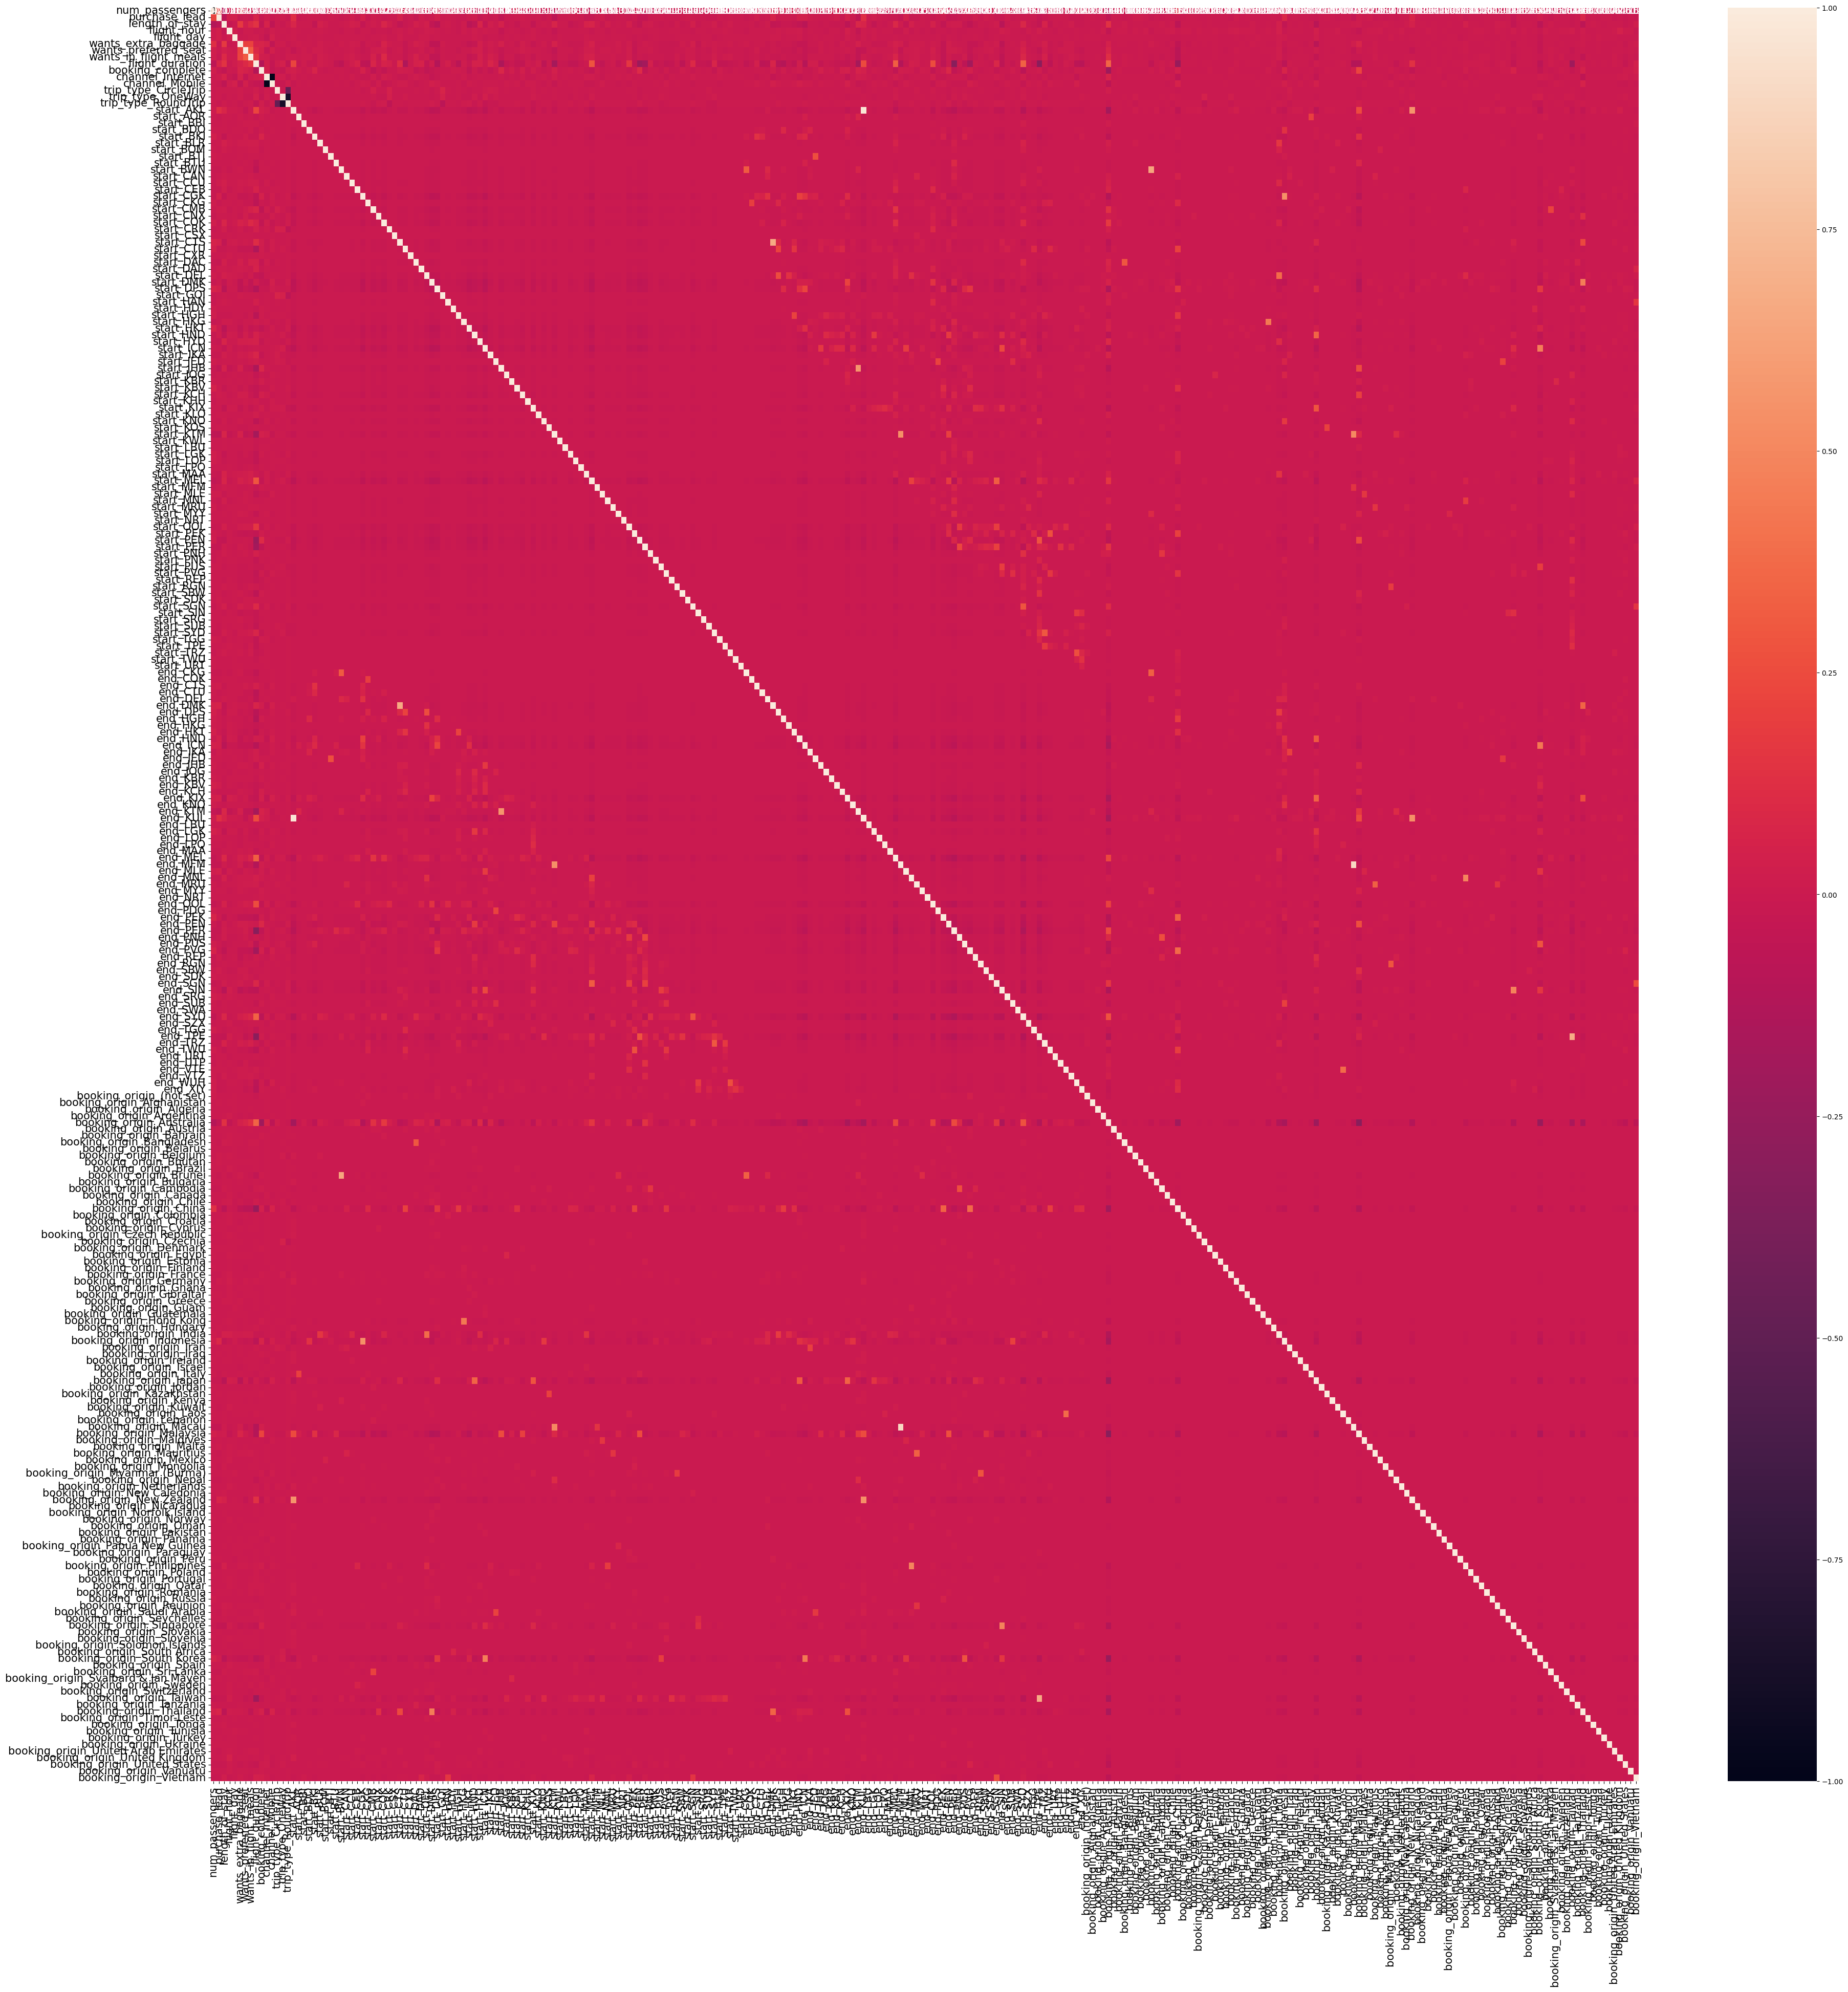

In [25]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [26]:
y = df['booking_complete']
x = df.drop(columns='booking_complete')

In [27]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
# Add model training in here!
model = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_split=2,bootstrap=True) # Add parameters to the model!

In [30]:
# param_grid = {
#     'n_estimators': [50,100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2)

# # Train GridSerchCV to the data   
# grid_search.fit(X_train, y_train)

In [31]:
# # Get the best parameters and the best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_  

# print("Best Parameters:", best_params)
# print("Best Estimator:", best_estimator)

In [33]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 174
False positives: 158
True negatives: 10490
False negatives: 1678



In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10648
           1       0.52      0.09      0.16      1852

    accuracy                           0.85     12500
   macro avg       0.69      0.54      0.54     12500
weighted avg       0.81      0.85      0.81     12500



[[10490   158]
 [ 1678   174]]


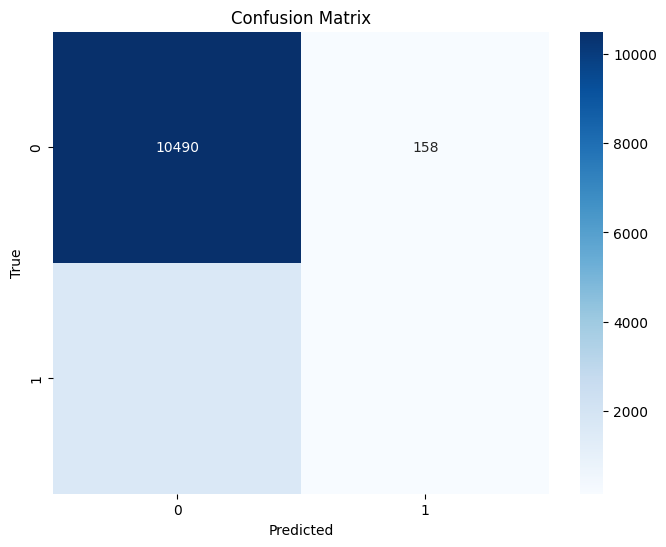

In [36]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
feature_imp = model.feature_importances_

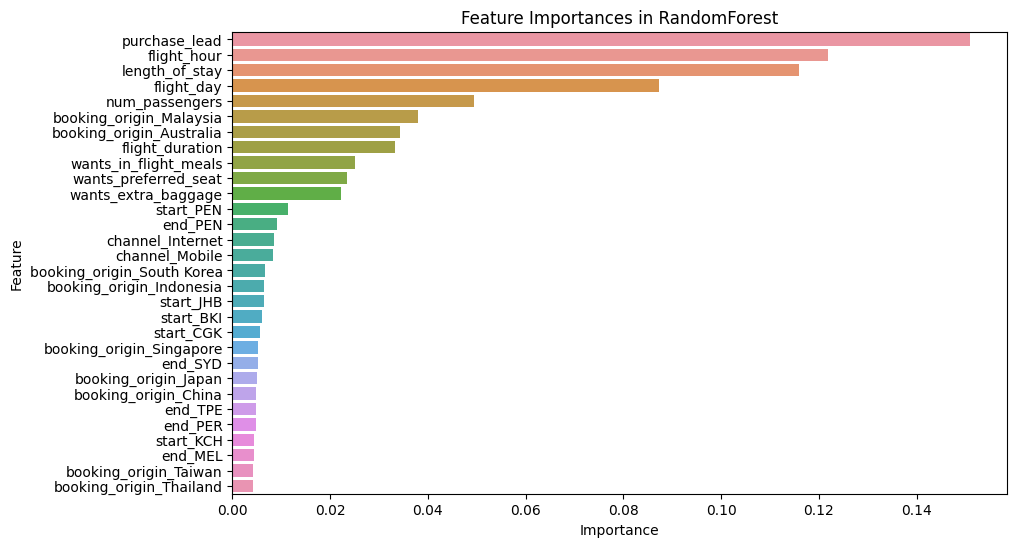

In [43]:
# Get the feature importances
importances = model.feature_importances_
feature_names = x.columns

# Create a DataFrame for plotting
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df[:30])
plt.title('Feature Importances in RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()